#Find Redundant Features

##Import libraries and get data

In [0]:
# Data managment 
import pandas as pd 
import numpy as np 

#Utilities
import pickle
import os

#Visualization
import matplotlib.pyplot as plt

In [0]:
%%capture
#Get data, small file so no if
if not os.path.isfile('all_scaled0_1.csv'): 
    !wget 'https://drive.google.com/uc?export=download&id=1-ET9vXPKudU92XuWeR0wIL67byS2llq-' -O all_scaled0_1.csv

##Data Parsing

In [0]:
data_file = 'all_scaled0_1.csv'

In [0]:
data = pd.read_csv(data_file,index_col=0)
labels = data['label']
run = data['run']
chunkID = data['chunkID']
period = data['period']
data = data.drop(['label','chunkID','run','period'], axis = 1)

no_samples, no_features = data.shape

print(no_samples, no_features)
print(labels.value_counts())

data.head()

3429 233
0.0    3262
1.0     167
Name: label, dtype: int64


,bz,meanTPCnclF,rmsTPCnclF,meanTPCChi2,rmsTPCChi2,slopeATPCnclF,slopeCTPCnclF,slopeATPCnclFErr,slopeCTPCnclFErr,meanTPCncl,rmsTPCncl,slopeATPCncl,slopeCTPCncl,slopeATPCnclErr,slopeCTPCnclErr,hasRawQA,rawClusterCounter,rawSignalCounter,offsetdZA,slopedZA,offsetdZC,slopedZC,offsetdZAErr,slopedZAErr,offsetdZCErr,slopedZCErr,offsetdZAchi2,slopedZAchi2,offsetdZCchi2,slopedZCchi2,offsetdZAPos,slopedZAPos,offsetdZCPos,slopedZCPos,offsetdZAErrPos,slopedZAErrPos,offsetdZCErrPos,slopedZCErrPos,offsetdZAchi2Pos,slopedZAchi2Pos,...,oroc_C_side,MIPattachSlopeC,MIPattachSlopeA,resolutionMIP,meanMIP,meanMIPele,resolutionMIPele,electroMIPSeparation,tpcItsMatchA,tpcItsMatchHighPtA,tpcItsMatchC,tpcItsMatchHighPtC,phiPull,phiPullHighPt,ptPull,ptPullHighPt,yPull,yPullHighPt,zPull,zPullHighPt,lambdaPull,lambdaPullHighPt,tpcConstrainPhiA,tpcConstrainPhiC,meanPTRelativeA,medianPTRelativeA,rmsPTRelativeA,meanPTRelativeC,medianPTRelativeC,rmsPTRelativeC,meanHVandPTGainCorrIROC,medianHVandPTGainCorrIROC,rmsHVandPTGainCorrIROC,meanHVandPTGainCorrOROC,medianHVandPTGainCorrOROC,rmsHVandPTGainCorrOROC,meanVDriftCorr,medianVDriftCorr,rmsVDriftCorr,interactionRate
0,0.0,0.650378,0.212065,0.586648,0.299807,0.567304,0.506033,0.029799,0.506033,0.661859,0.130696,0.638500,0.432987,0.026360,0.432987,1.0,0.586239,0.630747,0.676500,0.505639,0.456515,0.479150,0.029047,0.025431,0.009684,0.011481,0.066360,0.066360,0.126838,0.126838,0.539923,0.675482,0.422997,0.501126,0.008516,0.015049,0.004693,0.005500,0.018955,0.018955,...,1.0,0.842762,0.992611,0.094750,0.032376,0.539362,0.377138,0.013496,0.532074,0.573832,0.586826,0.582128,0.279488,0.558088,0.489128,0.478282,0.057793,0.397318,0.303648,0.494765,0.564013,0.819216,0.365811,0.029029,0.644374,0.643025,0.030060,0.645929,0.644593,0.029592,0.644385,0.643058,0.003333,0.731516,0.730402,0.030475,0.062052,0.062018,0.033067,0.224399
1,0.0,0.652363,0.219786,0.579001,0.299619,0.553643,0.490807,0.028887,0.490807,0.662852,0.129801,0.622553,0.431335,0.025804,0.431335,1.0,0.586239,0.630747,0.672718,0.471739,0.656468,0.622429,0.028192,0.024807,0.010054,0.011773,0.098105,0.098105,0.201625,0.201625,0.526042,0.667218,0.626295,0.612202,0.008705,0.014936,0.004920,0.005719,0.078152,0.078152,...,1.0,0.828729,0.992595,0.091434,0.033806,0.539610,0.377678,0.013927,0.529813,0.549569,0.583827,0.581842,0.295763,0.618659,0.506106,0.508984,0.096134,0.428699,0.344592,0.458420,0.559882,0.844903,0.279536,0.084570,0.645829,0.644559,0.044541,0.647352,0.646086,0.044614,0.645843,0.644604,0.005065,0.732617,0.731569,0.046314,0.061865,0.061878,0.008953,0.224399
2,0.0,0.656779,0.213371,0.582115,0.302841,0.576802,0.486826,0.028507,0.486826,0.664891,0.128520,0.622628,0.414198,0.025567,0.414198,1.0,0.586239,0.630747,0.709053,0.424595,0.774050,0.716557,0.027634,0.024176,0.010050,0.011627,0.102944,0.102944,0.235948,0.235948,0.559119,0.630758,0.748653,0.689030,0.008364,0.014483,0.004980,0.005612,0.144460,0.144460,...,1.0,0.829774,0.993051,0.089755,0.023854,0.539159,0.377654,0.013651,0.534614,0.567858,0.584458,0.586257,0.281763,0.572836,0.508496,0.493338,0.091167,0.420849,0.341413,0.461882,0.561373,0.828174,0.319029,0.133775,0.645117,0.644090,0.046651,0.646626,0.645604,0.046878,0.645142,0.644119,0.005186,0.732088,0.731203,0.047418,0.061668,0.061682,0.027615,0.224399
3,0.0,0.650338,0.217591,0.590880,0.307098,0.573718,0.465535,0.029239,0.465535,0.657125,0.127972,0.628921,0.413237,0.025642,0.413237,1.0,0.586239,0.630747,0.684981,0.453121,0.865839,0.786867,0.029305,0.025690,0.010495,0.012253,0.074307,0.074307,0.257066,0.257066,0.539152,0.660319,0.849890,0.748568,0.008935,0.015657,0.005144,0.005934,0.084640,0.084640,...,1.0,0.835028,0.992149,0.091761,0.025925,0.539396,0.377537,0.014017,0.520301,0.541670,0.572863,0.589802,0.270435,0.602295,0.511802,0.537189,0.105408,0.439337,0.365844,0.496001,0.529956,0.807985,0.251844,0.160170,0.639891,0.637870,0.174869,0.641396,0.639382,0.175343,0.639929,0.637938,0.019871,0.728152,0.726535,0.181697,0.061461,0.061460,0.007084,0.224399
4,0.0

##LogisticRegresion RFE
Recursive Feature Elimination with 3 fold cross validation based on Logistic Regresion Model

(~3 mins)

In [0]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

#max iter changed to 10k to assure convergence 
logreg = LogisticRegression(solver = 'lbfgs', max_iter = 10000)
rfe_logreg = RFECV(logreg, n_jobs=-1, cv = 3)
rfe_logreg.fit(data, labels)

#RFE ranking where features makred 1 are selected and bigger numer means worse feature
rfe_logreg_mark = rfe_logreg.ranking_
print(rfe_logreg_mark)

[ 74  70  98  19   1  23  60  90  55   8  29 137  66 104  63   1 132   1
 180  61  58  14  39  67 145 135   1   1 164 166 173 136  86 130 133 118
 179 174  17  30  21  33 139  68  38   1 110 113 142 131   1   1  75  84
 185 144  73 152 120 103  12  20  22  31  80 111   1   1 138 162 115 168
 106 124  24  26  50  44 147 177  76 128 169 159  99  87   4   1   1  11
 105   1  92  34   1 163  88   2   1   1   3   5   1   1   1   1  81   1
   1  69 119  35  47 116 122 102 141 181 171 140 165 143 158 178  59 126
  54 154 123 157 127  96 125 149 114 167 112  43  32  16  36  10 153 183
   1  48  56  46 150 121  93  49  13   1   1 172  51 170  45   1   1   1
 155  64 151   1   1  25   1  53  65 101  94  42  52  28 161 134 108  57
   1   6   1  95 148 175  15   1   9   1   1   1   1   1 193 190 129 191
 189 192 184   1 109   1 182 146  37   7  71 186  85  77  18  41 176 160
 187  83  72  89  97  91 100  79  40 188  78  82 117  62 107  27 156]


In [0]:
#Create array of best features. 
indices = np.argsort(rfe_logreg_mark)
rfe_logreg_rank = data.columns.to_numpy()[indices]

#Save inverted version of rfe_rank, so that worse feature is on 0 postion
rfe_logreg_rank = np.flip(rfe_logreg_rank)

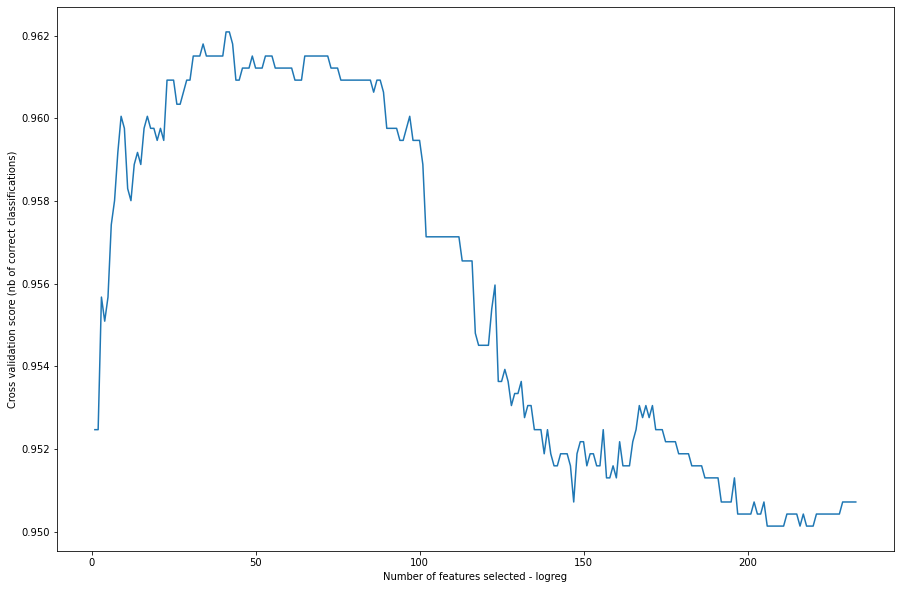

In [0]:
plt.figure(figsize = (15,10))
plt.xlabel("Number of features selected - logreg")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfe_logreg.grid_scores_) + 1), rfe_logreg.grid_scores_)
plt.show()

## Concatenate all results and save data

In [0]:
ranks = pd.DataFrame(columns = ['logreg'])
ranks['logreg'] = rfe_logreg_rank

ranks.to_csv("feature_rank.csv")
ranks.head()

,logreg
0,MIPattachSlopeC
1,resolutionMIPele
2,meanMIP
3,MIPattachSlopeA
4,meanMIPele
